In [1]:
from os import listdir
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd

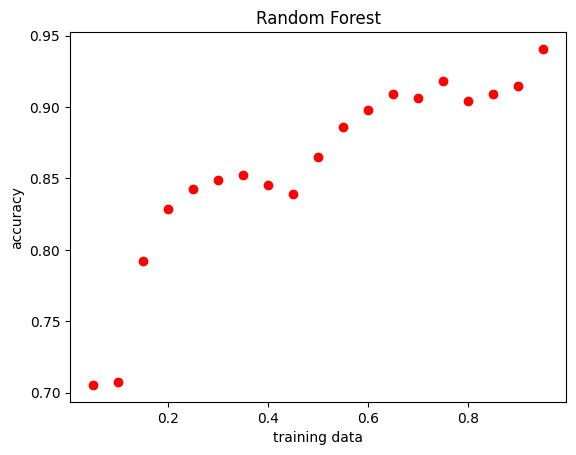

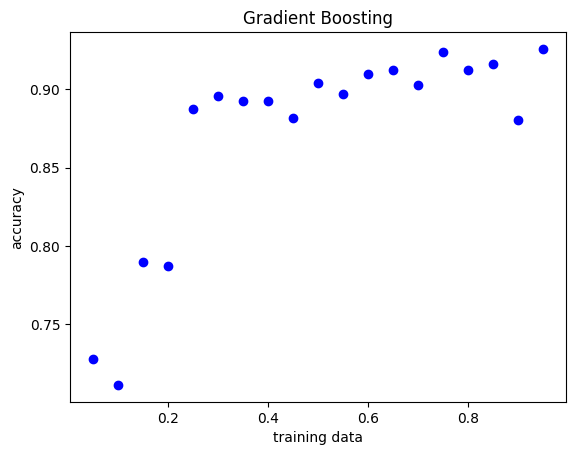

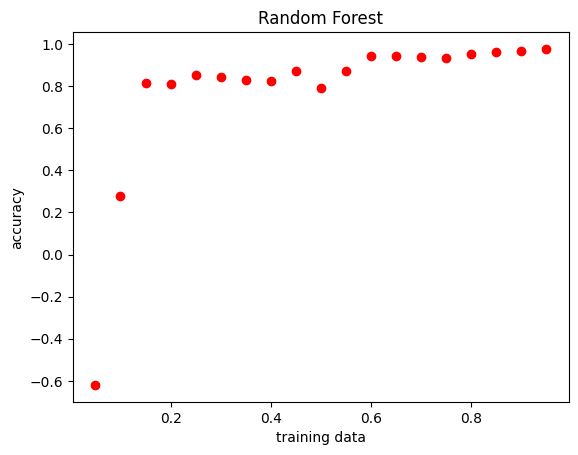

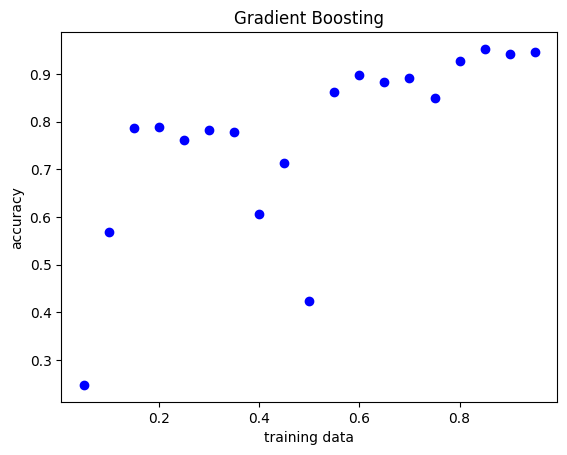

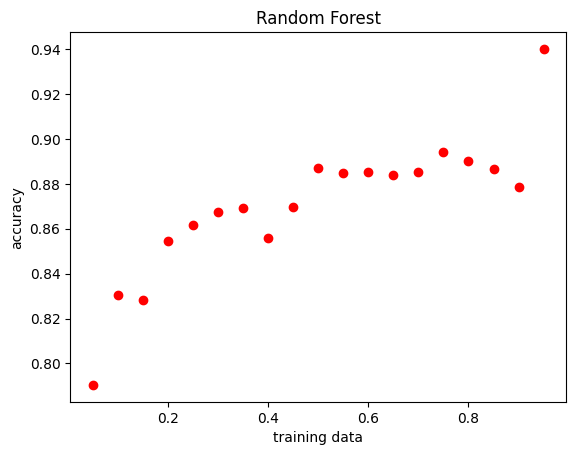

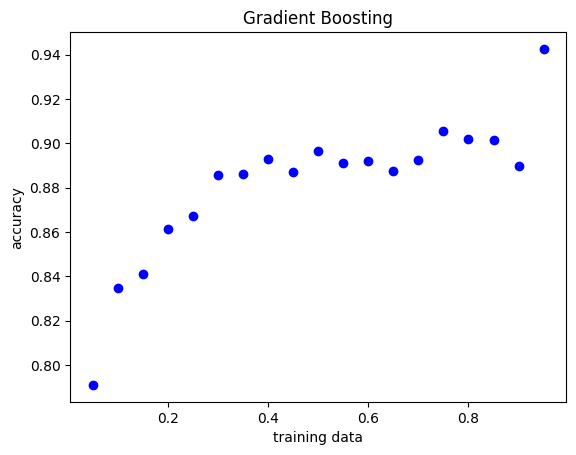

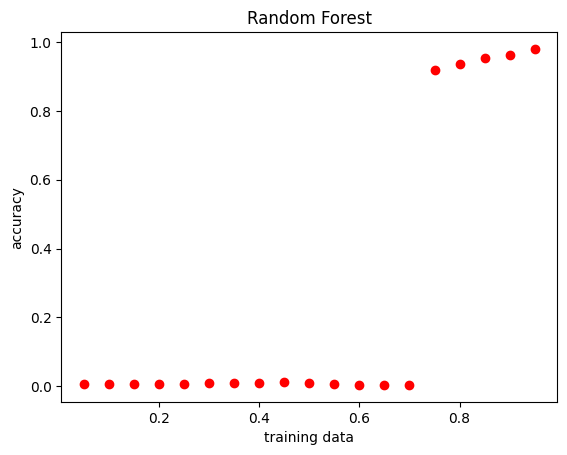

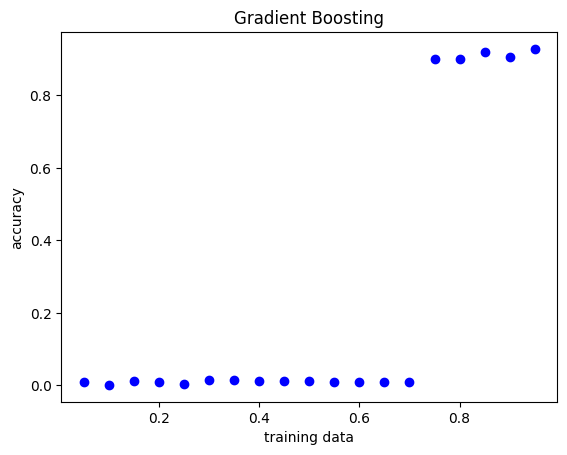

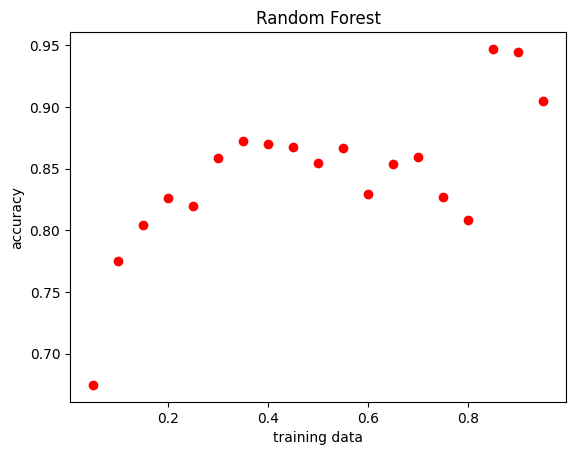

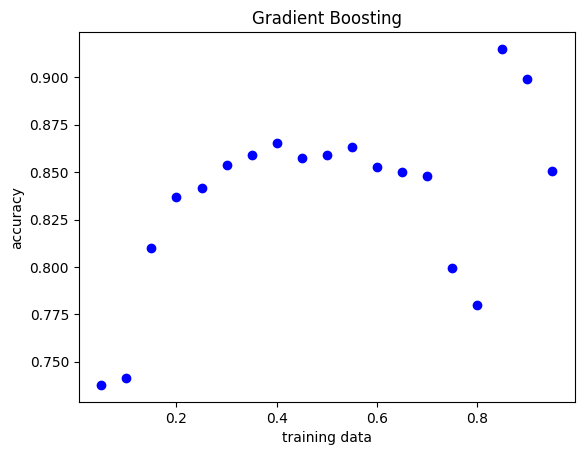

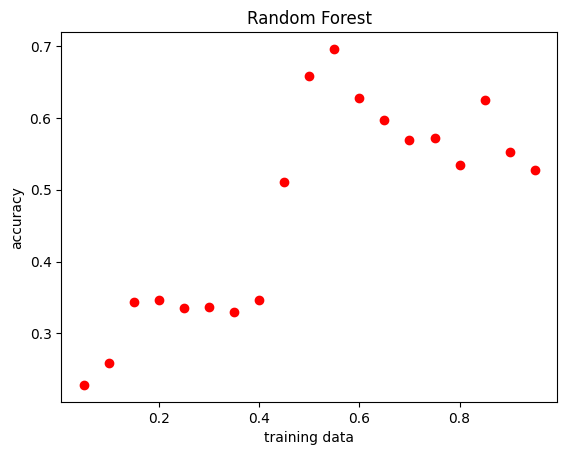

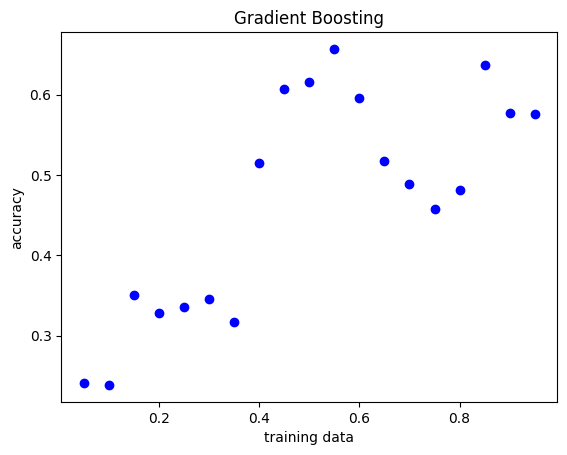

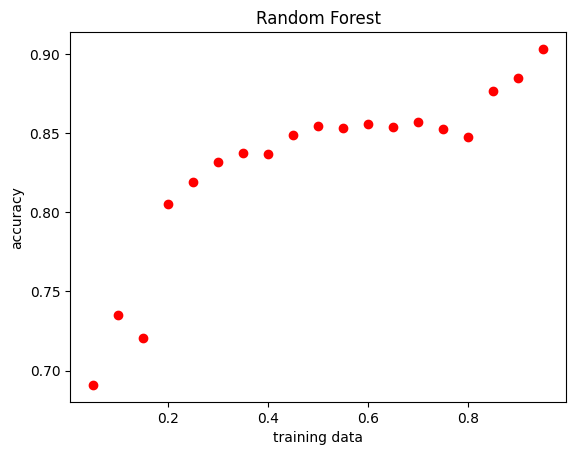

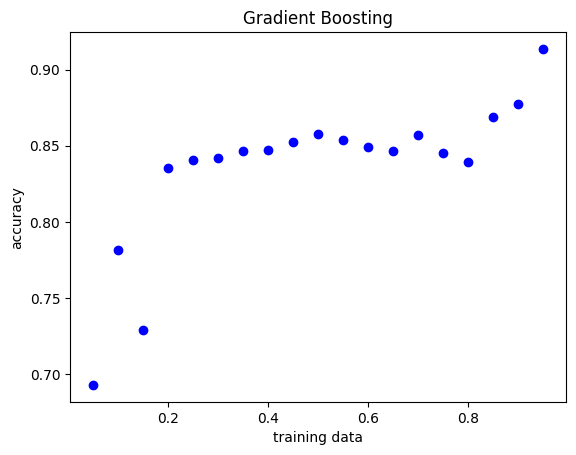

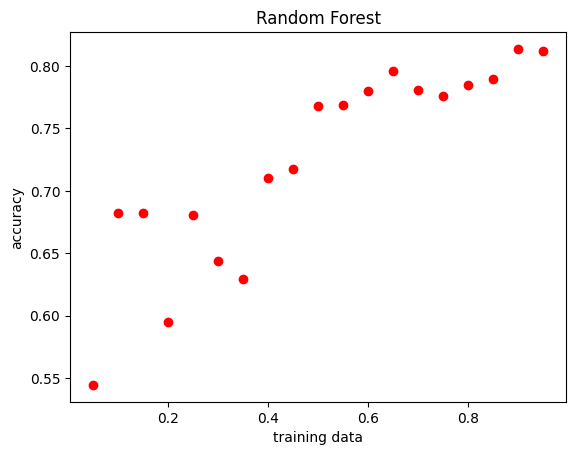

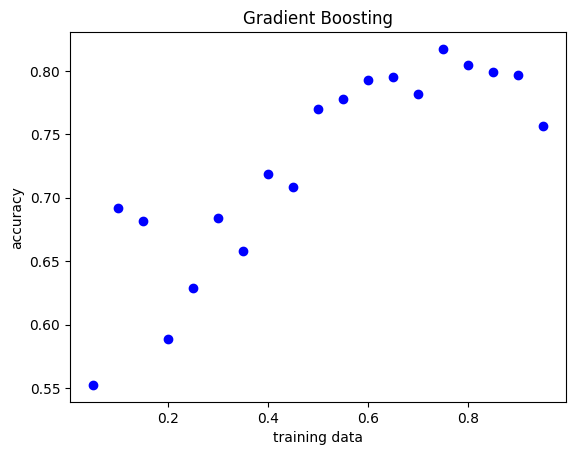

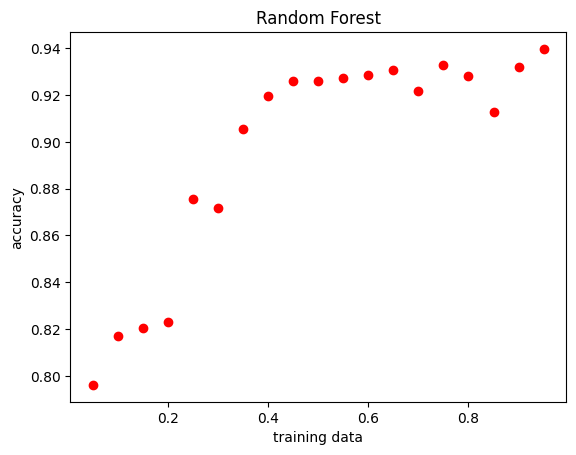

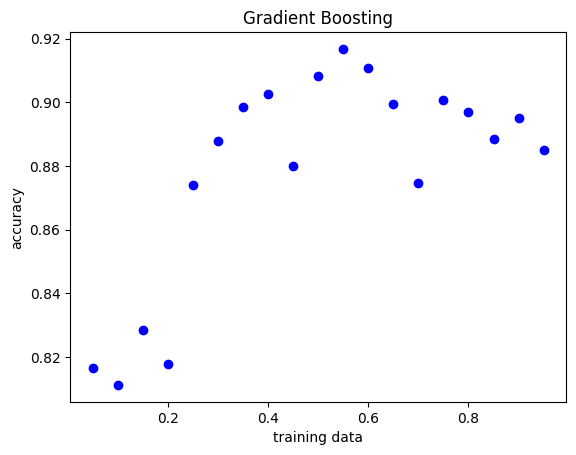

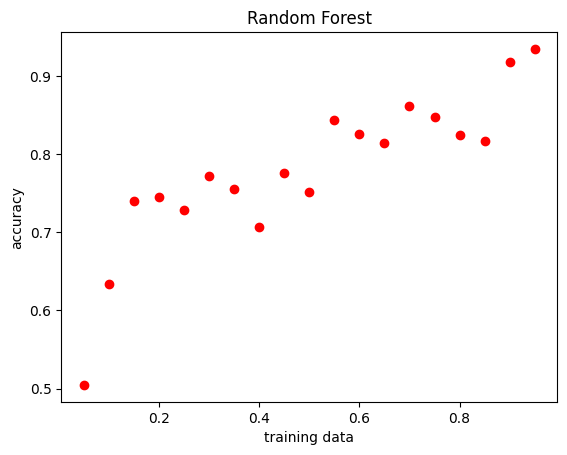

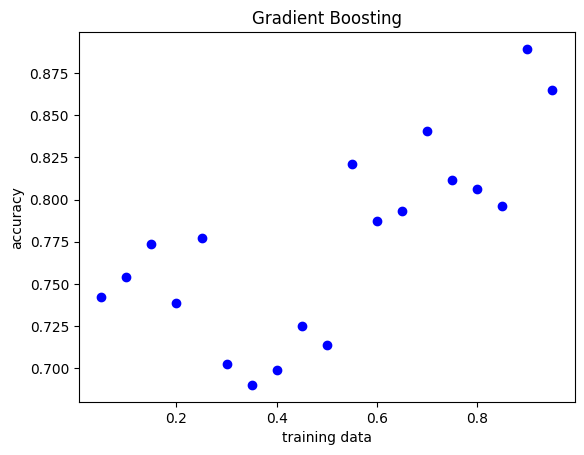

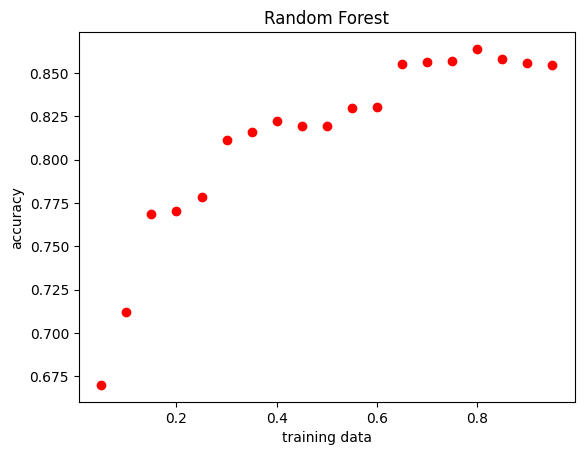

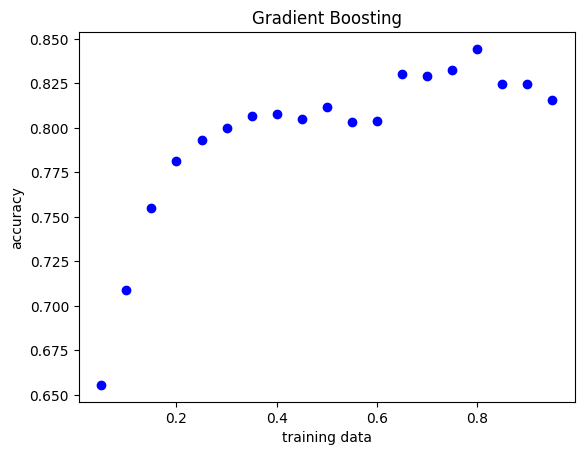

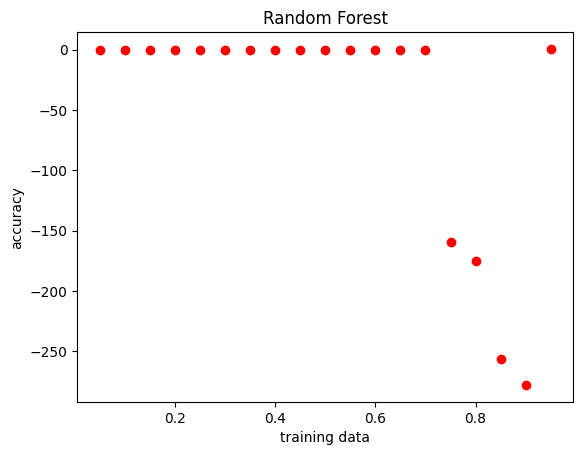

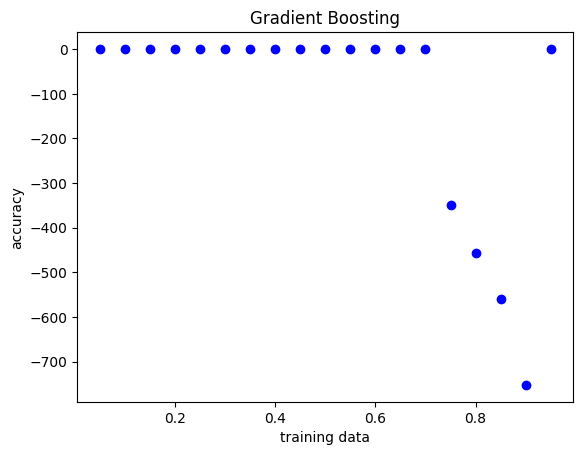

In [2]:
for file in listdir("data"):
	data = pd.read_csv("data/" + file)
	for column in ["Identity", "Link"]:
		try:
			data.drop(column, axis = 1, inplace = True)
		except KeyError:
			pass
	for column in data.select_dtypes(include = "float64").columns:
		data = pd.concat([data, data.pop(column)], axis = 1)
	data = pd.concat([data, pd.get_dummies(data.pop("Location").str.split(" > ", expand = True))], axis = 1)
	x = data.drop("Price", axis = 1)
	y = data["Price"]
	trainSizes = []
	accuraciesRF = []
	accuraciesGB = []
	for i in range(5, 100, 5):
		trainSize = i / 100
		testSize = round(1 - trainSize, 2)
		trainSizes.append(trainSize)
		trainX, testX, trainY, testY = train_test_split(x, y, test_size = testSize, random_state = 1)
		modelRF = Pipeline([
		("scaler", MinMaxScaler()),
		("model", RandomForestRegressor())
		])
		modelRF.fit(trainX, trainY)
		accuracyRF = modelRF.score(testX, testY)
		accuraciesRF.append(accuracyRF)



		modelGB = Pipeline([
		("scaler", MinMaxScaler()),
		("model", GradientBoostingRegressor())
		])
		modelGB.fit(trainX, trainY)
		accuracyGB = modelGB.score(testX, testY)
		accuraciesGB.append(accuracyGB)



	plt.scatter(trainSizes, accuraciesRF, c = "red")
	plt.title("Random Forest")
	plt.xlabel("training data")
	plt.ylabel("accuracy")
	plt.savefig("../Module3/static/" + file + "RF.png")
	plt.show()



	plt.scatter(trainSizes, accuraciesGB, c = "blue")
	plt.title("Gradient Boosting")
	plt.xlabel("training data")
	plt.ylabel("accuracy")
	plt.savefig("../Module3/static/" + file + "GB.png")
	plt.show()